In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
if '..' not in sys.path:
    sys.path.append('..')

In [3]:
import random as rd
import numpy as np
import networkx as nx

from matplotlib import pyplot as plt
%matplotlib inline

from dynamics_ind import SimulationSIR, PriorityQueue, sample_seeds

In [17]:
n_nodes = 1000
graph = nx.complete_graph(n=n_nodes)

# graph = nx.from_edgelist([(0, 1), (1,2), (2,3), (3,4), (4,5)], create_using=nx.Graph)
# n_nodes = graph.number_of_nodes()

A = nx.adjacency_matrix(graph).toarray()


beta = 1 / 8.0
delta = n_nodes / 12.3

gamma = 0.0
rho = 0.0
eta = 1.0

q_x = 300.0
q_lam = 1.0

max_time = 10.0

policy_dict = {
    'TR': 0.06,
    'MN': 0.012,
    'LN': 0.012,
    'LRSR': 22.807,
    'MCM': 22.807,
    'FL_info': {'N': None, 'max_u': None},
}

policy_name = 'NO'

In [18]:
init_event_list = [
    [(0, 'inf', 0), 0.0],
    [(0, 'rec', None), rd.expovariate(delta)],
]

X_init = np.zeros(n_nodes)
X_init[0] = 1

print(init_event_list)

[[(0, 'inf', 0), 0.0], [(0, 'rec', None), 0.020955449007606965]]


---

In [19]:
param_dict = {
    'beta':  beta,   # Infection rate
    'delta': delta,  # Spontaneous recovery rate
    
    'gamma': gamma,  # Reduction in infection rate from treatement
    'rho':   rho,    # Recovery rate from treatement
    'eta': eta,      # Not used
    'q_x': q_x,      # Not used
    'q_lam': q_lam   # Not used
}

res_1 = {'sus': list(), 'inf': list(), 'rec': list()}

for i in range(30):
    print(i+1)
    sir = SimulationSIR(graph, **param_dict, verbose=True)
    sir.launch_epidemic(init_event_list=init_event_list, max_time=max_time, 
                        policy=policy_name, policy_dict=policy_dict)
    
    res_1['sus'].append(np.sum(sir.is_sus))
    res_1['inf'].append(np.sum(sir.is_inf * (1 - sir.is_rec)))
    res_1['rec'].append(np.sum(sir.is_rec))

1
Epidemic stopped after 0.03 days | 998 sus., 0 inf., 2 rec., 0 tre (nan% of inf) | I(q): 1995 R(q): 0 T(q): 0 |q|: 1995
2
Epidemic stopped after 0.25 days | 362 sus., 0 inf., 638 rec., 0 tre (nan% of inf) | I(q): 424207 R(q): 0 T(q): 0 |q|: 424207
3
Epidemic stopped after 0.03 days | 993 sus., 0 inf., 7 rec., 0 tre (nan% of inf) | I(q): 6961 R(q): 0 T(q): 0 |q|: 6961
4
Epidemic stopped after 0.02 days | 998 sus., 0 inf., 2 rec., 0 tre (nan% of inf) | I(q): 1995 R(q): 0 T(q): 0 |q|: 1995
5
Epidemic stopped after 0.22 days | 511 sus., 0 inf., 489 rec., 0 tre (nan% of inf) | I(q): 363685 R(q): 0 T(q): 0 |q|: 363685
6
Epidemic stopped after 0.25 days | 408 sus., 0 inf., 592 rec., 0 tre (nan% of inf) | I(q): 409317 R(q): 0 T(q): 0 |q|: 409317
7
Epidemic stopped after 0.31 days | 510 sus., 0 inf., 490 rec., 0 tre (nan% of inf) | I(q): 361773 R(q): 0 T(q): 0 |q|: 361773
8
Epidemic stopped after 0.12 days | 984 sus., 0 inf., 16 rec., 0 tre (nan% of inf) | I(q): 15725 R(q): 0 T(q): 0 |q|: 157

In [20]:
for k in res_1.keys():
    print(k, np.mean(res_1[k]))

sus 724.8333333333334
inf 0.0
rec 275.1666666666667


(array([ 6.,  4.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 16.]),
 array([320. , 387.9, 455.8, 523.7, 591.6, 659.5, 727.4, 795.3, 863.2, 931.1, 999. ]),
 <a list of 10 Patch objects>)

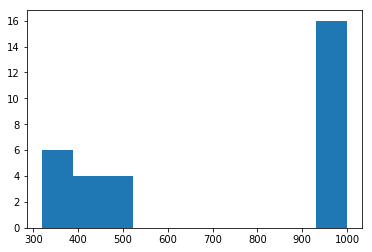

In [21]:
plt.hist(res_1['sus'])

---

In [22]:
from helpers import HelperFunc
from dynamics_deprecated import SIRDynamicalSystem

In [23]:
sim_dict = {
    'total_time': max_time,
    'trials_per_setting': 1
}
param_dict = {
    'beta':  beta,   # Infection rate
    'delta': delta,  # Spontaneous recovery rate
    'gamma': gamma,  # Reduction in infection rate from treatement
    'rho':   rho,    # Recovery rate from treatement
    'eta': eta,      # Not used
}
cost_dict = {
    'Qlam': q_x,
    'Qx': q_lam
}


res_2 = {'sus': list(), 'inf': list(), 'rec': list()}

for i in range(30):
    print(i+1)

    system = SIRDynamicalSystem(X_init, A, param_dict, cost_dict, min_d0=0.0, verbose=True, notebook=True)
    data = system.simulate_policy(policy_name, policy_dict, sim_dict, plot=False)

    h = HelperFunc()
    n_sus = np.sum(1 - h.sps_values(data['Y'], max_time))
    n_inf = np.sum(h.sps_values(data['Y'], max_time) * (1 - h.sps_values(data['W'], max_time)))
    n_rec = np.sum(h.sps_values(data['W'], max_time))
    res_2['sus'].append(n_sus)
    res_2['inf'].append(n_inf)
    res_2['rec'].append(n_rec)

1
time   0.00/10.00  | S:  999, I:   0, R: 1, H: 0, lY: 0.00, lW: 0.00, lN: 0.00 | 99.46 iter/s               
2
time   0.19/10.00  | S:  455, I:   0, R: 545, H: 0, lY: 0.00, lW: 0.00, lN: 0.00 | 100.20 iter/s                 
3
time   0.38/10.00  | S:  466, I:   0, R: 534, H: 0, lY: 0.00, lW: 0.00, lN: 0.00 | 94.57 iter/s                  
4
time   0.01/10.00  | S:  998, I:   0, R: 2, H: 0, lY: 0.00, lW: 0.00, lN: 0.00 | 108.11 iter/s               
5
time   0.01/10.00  | S:  998, I:   0, R: 2, H: 0, lY: 0.00, lW: 0.00, lN: 0.00 | 129.85 iter/s               
6
time   0.34/10.00  | S:  456, I:   0, R: 544, H: 0, lY: 0.00, lW: 0.00, lN: 0.00 | 48.27 iter/s                  
7
time   0.29/10.00  | S:  307, I:   0, R: 693, H: 0, lY: 0.00, lW: 0.00, lN: 0.00 | 78.68 iter/s                  
8
time   0.00/10.00  | S:  999, I:   0, R: 1, H: 0, lY: 0.00, lW: 0.00, lN: 0.00 | 93.77 iter/s               
9
time   0.01/10.00  | S:  999, I:   0, R: 1, H: 0, lY: 0.00, lW: 0.00, lN: 0.00 | 109.71 

In [24]:
for k in res_2.keys():
    print(k, np.mean(res_2[k]))

sus 736.5
inf 0.0
rec 263.5


(array([ 5.,  4.,  4.,  0.,  0.,  0.,  0.,  0.,  0., 17.]),
 array([307. , 376.2, 445.4, 514.6, 583.8, 653. , 722.2, 791.4, 860.6, 929.8, 999. ]),
 <a list of 10 Patch objects>)

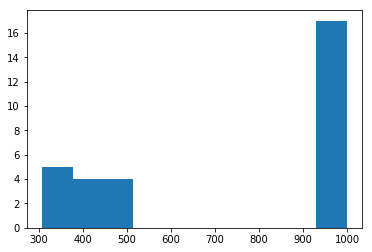

In [25]:
plt.hist(res_2['sus'])